# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

In [2]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [6]:
import pandas as pd

df_back = pd.read_csv('/content/drive/MyDrive/lower_back_pain_dataset2.csv', index_col = 0)
df_back

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
pelvic_incidence,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal


In [7]:
import pandas as pd
#utilizamos para leer desde distintos ordenadores
df_back = pd.read_csv('lower_back_pain_dataset2.csv', index_col = 0)

FileNotFoundError: ignored

Incluimos algunos datos sobre el dataset también:

In [8]:
df_back.describe().transpose()#analisis de datos


,count,mean,std,min,25%,50%,75%,max
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080
sacrum_angle,310.0,-14.053139,12.225582,-35.287375,-24.289522,-14.622856,-3.497094,6.972071


In [9]:
df_back.info()#información sobre las variables

<class 'pandas.core.frame.DataFrame'>
Float64Index: 310 entries, 63.0278175 to 33.84164075
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_tilt               310 non-null    float64
 1   lumbar_lordosis_angle     310 non-null    float64
 2   sacral_slope              310 non-null    float64
 3   pelvic_radius             310 non-null    float64
 4   degree_spondylolisthesis  310 non-null    float64
 5   pelvic_slope              310 non-null    float64
 6   Direct_tilt               310 non-null    float64
 7   thoracic_slope            310 non-null    float64
 8   cervical_tilt             310 non-null    float64
 9   sacrum_angle              310 non-null    float64
 10  scoliosis_slope           310 non-null    float64
 11  Class_att                 310 non-null    object 
dtypes: float64(11), object(1)
memory usage: 31.5+ KB


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?


Primero vamos a mirar si las clases a predecir están equilibradas. En un problema de clasificación los datos son esenciales, muchas veces obtener los datos y sacar los diferentes atributos es muy costoso tanto a nivel personal como económico. El tener las clases a predecir equilibradas es de gran importancia porque si tenemos muchas de una clase a predecir y muy pocas de la otra, cuando entrenemos el modelo vamos a poder entrenar muy bien el modelo para una clase pero cuando nos llegue la hora de evaluar con ejemplos que no hemos entrenado si son de la clase que no tenemos muchos ejemplos dará lugar a un modelo con muy poca precisión. Lo mismo sucede si casi todos los ejemplos con los que evaluamos son de una de las clases, ya que podremos comprobar si el modelo es preciso prediciendo una de las clases, pero no realmente si predice correctamente los datos.


In [37]:
df_back['Class_att'].value_counts() #nos dará cuantos ejemplos nos salen de cada clase
df_back['Class_att'].value_counts() / df_back['Class_att'].count() * 100 #nos dará la frecuencia de cada clase

Abnormal    67.741935
Normal      32.258065
Name: Class_att, dtype: float64

Vemos que hay más del doble de muestras de la clase abnormal en comparación con la clase normal, por tanto no están del todo equilibradas y nuestras soluciones por tanto tenderán a predecir abnormal con mayor frequencia.

Ahora miraremos cual de las variables tiene mayor índice de correlación con la variable de salida, es decir cual es la que mas esta relacionada con la variable de salida, para ello la clase de salida tiene que estar con valores numéricos.

In [42]:
#hacemos una copia de los datos para tenere el dataset original y tener una copia del dataset con una clase llamada 
#'class_num' que si el dato es abnormal entonces es 0 y si es normal 1
df_copy = df_back.copy()
df_copy['Class_num'] = 0
df_copy.loc[df_copy['Class_att'] =='Normal', 'Class_num'] = 1
#ahora ya estamos en condiciones de hacer la correlacion
data_corr = df_copy.corr()['Class_num']
df_back_correlation = pd.DataFrame(data = data_corr.values,index = data_corr.index,columns= ['valores'])
df_back_correlation

<ipython-input-42-882468e7a8b2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df_copy.corr()['Class_num']


,valores
pelvic_tilt,-0.326063
lumbar_lordosis_angle,-0.312484
sacral_slope,-0.210602
pelvic_radius,0.309857
degree_spondylolisthesis,-0.443687
pelvic_slope,-0.055865
Direct_tilt,0.039591
thoracic_slope,0.049354
cervical_tilt,-0.100044
sacrum_angle,-0.026887


La variable pelvic_radius es la que tiene mayor correlación positiva, lo que indica que un mayor valor en esta variable hace más probable que la clase sea normal (ya que le hemos asignado valor 1 a esta clase). Las variables degree_spondylolisthesis, pelvic_tilt y lumbar_lordosis_angle son las que tienen mayor correlación negativa, por tanto un valor más alto en ellas hace más probable la clase abnormal. El resto de variables también tienen alguna correlación positiva o negativa con la clase, pero menos significativa por lo que individualmente son menos útiles para averigüar la clase.

In [36]:
#Calculamos los rangos 
mayor_corr = ['pelvic_radius', 'degree_spondylolisthesis', 'pelvic_tilt', 'lumbar_lordosis_angle']
desc = df_back.describe()
for v in  mayor_corr:
    print('Rango ' + v + ': de ' + (str)(desc[v].min()) + ' a ' + (str)(desc[v].max()))
    #print('Percentil 25: ' + (str)(desc[v][4]))
    #print('Percentil 50: ' + (str)(desc[v][5]))
    #print('Percentil 75: ' + (str)(desc[v][6]))

Rango pelvic_radius: de 13.317377044904573 a 310.0
Rango degree_spondylolisthesis: de -11.05817866 a 418.5430821
Rango pelvic_tilt: de -6.554948347 a 310.0
Rango lumbar_lordosis_angle: de 14.0 a 310.0


<AxesSubplot:ylabel='Density'>

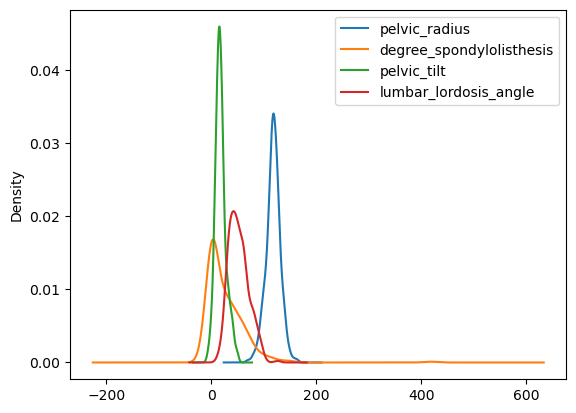

In [ ]:
#Dibujamos las distribuciones
df_back[mayor_corr].plot(kind="density")

array([[<AxesSubplot:xlabel='pelvic_radius', ylabel='pelvic_radius'>,
        <AxesSubplot:xlabel='degree_spondylolisthesis', ylabel='pelvic_radius'>,
        <AxesSubplot:xlabel='pelvic_tilt', ylabel='pelvic_radius'>,
        <AxesSubplot:xlabel='lumbar_lordosis_angle', ylabel='pelvic_radius'>],
       [<AxesSubplot:xlabel='pelvic_radius', ylabel='degree_spondylolisthesis'>,
        <AxesSubplot:xlabel='degree_spondylolisthesis', ylabel='degree_spondylolisthesis'>,
        <AxesSubplot:xlabel='pelvic_tilt', ylabel='degree_spondylolisthesis'>,
        <AxesSubplot:xlabel='lumbar_lordosis_angle', ylabel='degree_spondylolisthesis'>],
       [<AxesSubplot:xlabel='pelvic_radius', ylabel='pelvic_tilt'>,
        <AxesSubplot:xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt'>,
        <AxesSubplot:xlabel='pelvic_tilt', ylabel='pelvic_tilt'>,
        <AxesSubplot:xlabel='lumbar_lordosis_angle', ylabel='pelvic_tilt'>],
       [<AxesSubplot:xlabel='pelvic_radius', ylabel='lumbar_lordosis_a

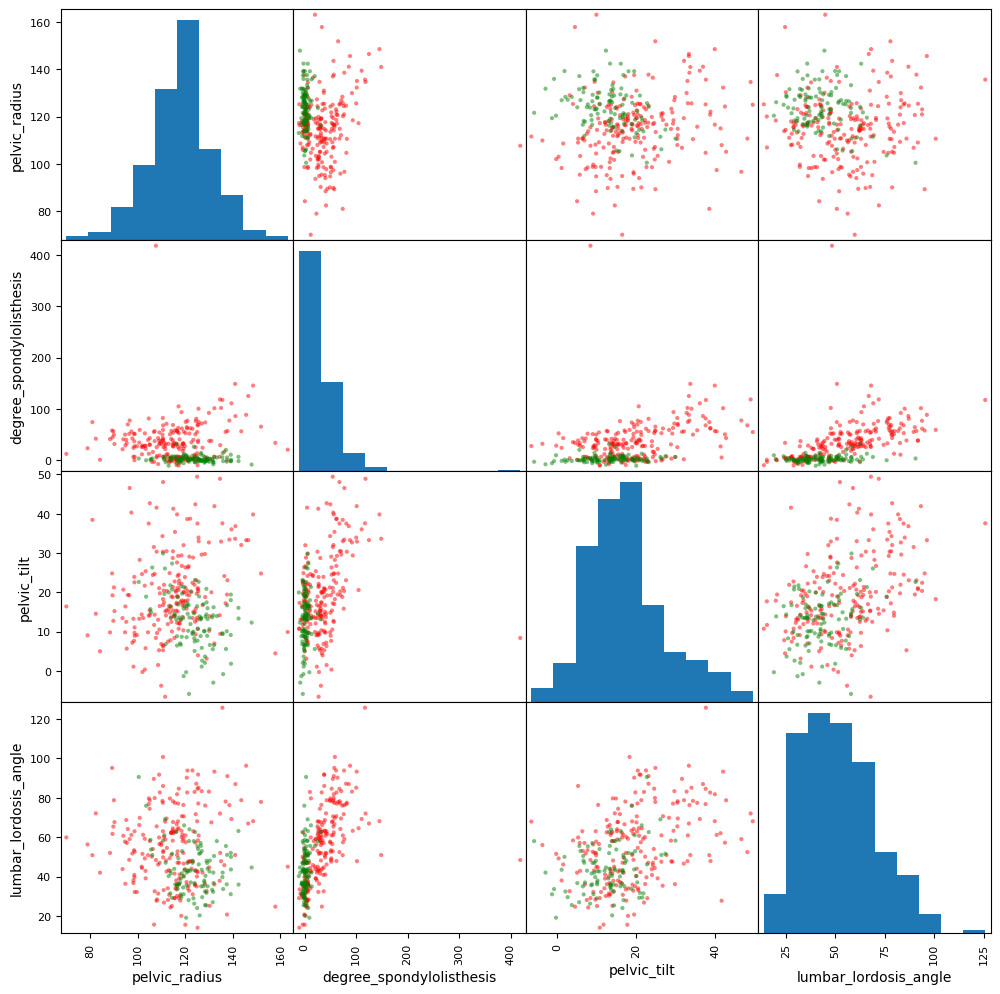

In [ ]:
#Diagaramas de dispersión
from pandas.plotting import scatter_matrix

l = mayor_corr.copy()
l.append('Class_att')
df2 = df_back.loc[:, l] #dataframe con solo las filas que queremos
dic_colors = { 'Normal': 'green', 'Abnormal': 'red' } #Distintos colores en cada clase
colors = df2['Class_att'].map(dic_colors)
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist', color=colors)


Ningún par de variables de las comparadas parece separar bien las clases.

Viendo que ni tomando dos de las variables de mayor correlación se obtienen resultados claros, parece que el problema de averigüar la clase dados el resto de datos va a ser difícil de resolver.

## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Decide razonadamente si es necesario escalar o estandarizar los datos.

Al aplicar árboles de decisión no es queremos escalar ni estandarizar los datos porque el método funciona con cualquier rango de las variables, así que no es necesario, y al escalarlas o estandarizarlas habría que deshacer el cambio al terminar para poder aplicar el resultado.

### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [ ]:
df_back.keys()

Index(['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt',
       'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope',
       'Class_att'],
      dtype='object')

In [19]:
variables = ['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt',
       'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope',] 

In [20]:
df_copy2 = df_copy.loc[:,variables]

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import numpy as np

train_accuracy = []
test_accuracy = []

max_depths = range(1, 10) #Probamos hasta profundidad 10
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=89)
    scores = cross_validate(clf, df_copy2, df_copy['Class_num'], scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

test_accuracy

[0.7709677419354839,
 0.6548387096774194,
 0.7483870967741935,
 0.7548387096774193,
 0.7774193548387097,
 0.7580645161290323,
 0.7483870967741936,
 0.7322580645161291,
 0.7516129032258065]

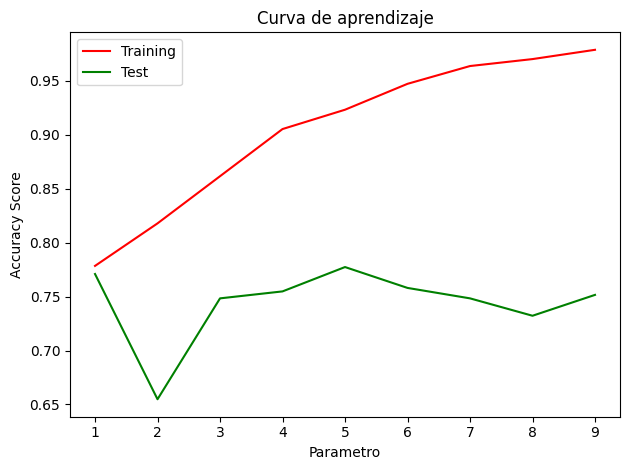

In [22]:
#Graficamos las curvas de aprendizaje

import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

Podemos ver que al aumentar la profundidad del árbol aumenta la precisión en los casos de entrenamiento, pero la precisión en el test no hace lo mismo, sino que alcanza su máximo en profundidad 5. En profundidades menores a 5 parece que no es lo suficientemente preciso el árbol, y en profundidades superiores parece que "sobreaprende". Por tanto el mejor valor para la profundidad del árbol es 5. 

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


In [23]:
#Creamos un arbol con profundidad 5
 
clf = DecisionTreeClassifier(criterion="entropy" , max_depth=5, random_state=51)
clf = clf.fit(df_copy2, df_copy['Class_num'])

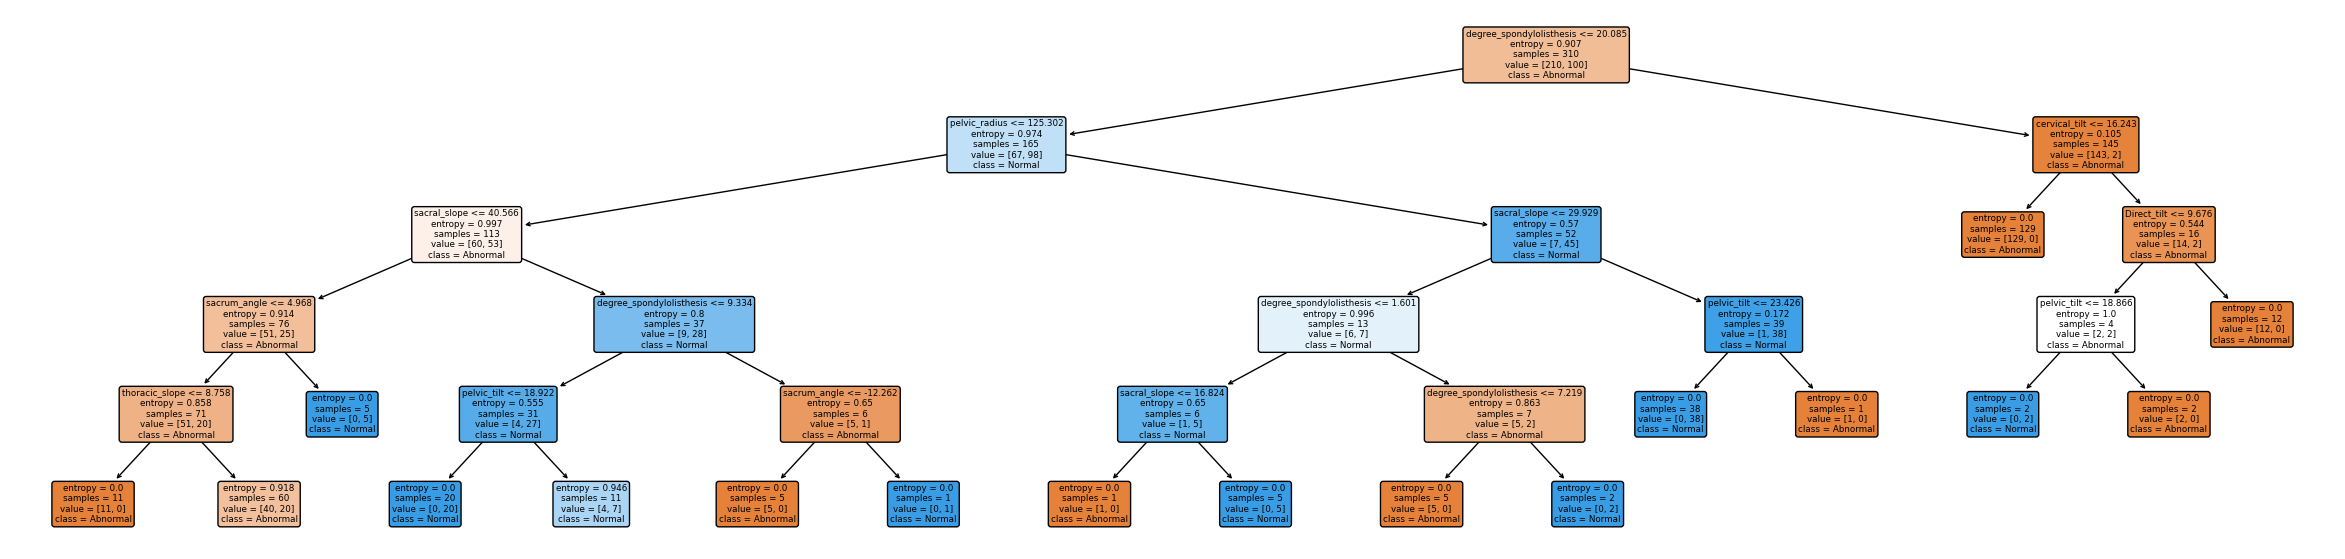

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(30,7))
plot_tree(clf, filled=True, feature_names=variables, class_names=['Abnormal','Normal'], rounded=True)
plt.show()
#Doble click sobre la imagen para verla mejor

In [25]:
importances = clf.feature_importances_ #Las importancias de cada variable
names = clf.feature_names_in_ #El nombre de cada variable

both = []
for i in range(0, clf.max_features_):
    both.append((importances[i], names[i]))#Nombre e importancia juntos

both.sort(reverse = True)#Orden decreciente
both

[(0.5691745794481446, 'degree_spondylolisthesis'),
 (0.12749930612618127, 'sacral_slope'),
 (0.08552064173569174, 'pelvic_radius'),
 (0.08114773408037891, 'pelvic_tilt'),
 (0.05772602388570857, 'sacrum_angle'),
 (0.030262118508960312, 'cervical_tilt'),
 (0.026895995425910337, 'thoracic_slope'),
 (0.021773600789024176, 'Direct_tilt'),
 (0.0, 'scoliosis_slope'),
 (0.0, 'pelvic_slope'),
 (0.0, 'lumbar_lordosis_angle')]

Podemos ver que las más importantes son, en orden: degree_spondylolisthesis, sacral_slope, pelvic_radius, pelvic_tilt. Tres de ellas coinciden con tres de las cuatro variables con mayor correlación que observamos en un apartado anterior. sacral_sclope no tiene una de las mayores correlaciones pero sí parece tener de las mayores importancias en el árbol. 

Tres de las variables no han sido utilizadas, una de ellas sorprendentemente, ya que lumbar_lordosis_angle estaba entre las que tenían mayor correlación negativa. Puede que sea porque tiene una distribución similar a alguna va riable con también correlación negativa alta y esta otra ocupa su lugar en el árbol.

Tras una sola pregunta la tasa de acierto sería la siguiente:

In [26]:
(98 + 143)/310 #Al irse a la izquierda acierta 98 con Normal y al irse a la derecha 143 con Abnormal

0.7774193548387097

El árbol separa las clases en la mayoría de los casos, sin embargo, en dos de las hojas sigue habiendo elementos de dos clases distintas, por lo que no las separa del todo. Estas hojas son la segunda y la cuarta contando por la izquierda.

En el nivel 2 vemos mayor confusión en el nodo más a la izquierda, donde hay 60 Abnormales y 53 Normales, casi los mismos de ambas clases. En los otros nodos a ese mismo nivel ya hay una mayoría más clara de una de las dos clases.

## 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [88]:
#Utilizamos el código del documento sobre árboles para calcular la precisión, exhaustividad y valor F1 agragados.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=42)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, df_copy2, df_copy['Class_num'], 
                                       scoring=scoring_metrics, cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.790329882187452
Exhaustividad ponderada media:  0.7741935483870968
F1 ponderado media:  0.7586758138007254


In [85]:
#Tomamos ahora el código para las métricas detalladas de cada clase
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=54)
predictions = cross_val_predict(clf, df_copy2, df_copy['Class_num'], cv=10)

# Informe por clases
cr = classification_report(df_copy['Class_num'],predictions, target_names=['Abnormal', 'Normal'])
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.83      0.85      0.84       210
      Normal       0.67      0.63      0.65       100

    accuracy                           0.78       310
   macro avg       0.75      0.74      0.74       310
weighted avg       0.78      0.78      0.78       310



In [86]:
# Para poder dibujar la matriz de confusión:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[179  31]
 [ 37  63]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

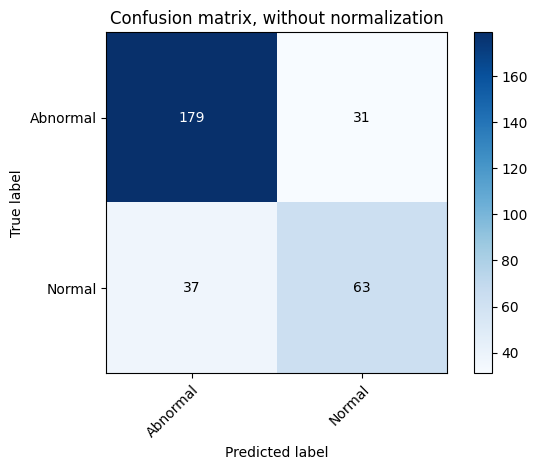

In [87]:
#Dibujamos la matriz de confusión
Class_names = ['Abnormal', 'Normal']
plot_confusion_matrix(df_copy['Class_num'], predictions, Class_names, normalize=False)

Una vez visto todo, no parece un método muy fiable. Para poder utilizarlo en una empresa real, seguramente hagan falta más datos para el entrenamiento, y aún así no podría usarse más que de forma orientativa. Posiblemente sea útil en los casos en los que se llega a una hoja en la que solo hay elementos de una clase, pero cuando se llega a una hoja que aún tiene de ambas clases, habría que suplementar este método con algún otro análisis.

Una ventaja de este método es que se puede interpretar muy bien qué variables son las más importantes a observar si se quiere intentar llegar a una conclusión. Similarmente, también se ve qué variables no son muy relevantes para el problema. Por otro lado tiene la desventaja de que no es muy preciso y que hay casos en los que no te puede decir con seguridad a qué clase pertenecen los datos.

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

El k-NN Es una técnica de aprendizaje supervisado.
Debido al tipo de datos que utiliza esta técnica será necesario escalar los datos.
Para esta técnica es importante no incluir variables irrelevantes debido a que el k-NN tiene grandes problemas con la dimensionalidad. Para ello utilizaremos la correlación calculada en el apartado 2.

In [49]:
data_relevant = df_copy[df_back_correlation[abs(df_back_correlation['valores']) > 0.1].index]
data_relevant


Index(['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis', 'cervical_tilt', 'Class_num'],
      dtype='object')

In [58]:
from sklearn.preprocessing import MinMaxScaler
 #a partir de lo ejecutado arriba sacamos cuales son las varibles relevantes
variables_relevantes = ['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis','cervical_tilt']
variables_relevantes_escaladas = ['pelvic_tilt_esc', 'lumbar_lordosis_angle_esc', 'sacral_slope_esc', 'pelvic_radius_esc',
       'degree_spondylolisthesis_esc','cervical_tilt_esc']
#creamos un nuevo data frame con solo las variables relevantes
df_back_relevant = df_copy.loc[:,variables_relevantes]
df_back_relevant
min_max_scaler = MinMaxScaler()
df_rel_esc = df_back_relevant.copy()
#escalamos los datos y ya lso tenemos listos para utilizar solo con las variables relevantes
df_rel_esc[variables_relevantes_escaladas] = min_max_scaler.fit_transform(df_back[variables_relevantes])
df_rel_esc['Class_att'] = df_copy['Class_att']
df_rel_esc

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,cervical_tilt,pelvic_tilt_esc,lumbar_lordosis_angle_esc,sacral_slope_esc,pelvic_radius_esc,degree_spondylolisthesis_esc,cervical_tilt_esc,Class_att
pelvic_incidence,,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,15.30468,0.519900,0.229180,0.250857,0.307461,0.025148,0.845115,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,16.78486,0.296783,0.098578,0.144629,0.476649,0.036365,0.996300,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,16.65897,0.513932,0.322995,0.307661,0.386097,0.017523,0.983442,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,11.42447,0.557414,0.271260,0.289436,0.341826,0.051838,0.448790,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,8.87237,0.289479,0.128129,0.247022,0.409579,0.044173,0.188118,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,8.51707,0.360293,0.196881,0.193591,0.509380,0.015858,0.151828,Normal
53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,7.08745,0.487194,0.136211,0.183674,0.476223,0.024761,0.005807,Normal
61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,8.89572,0.522443,0.287897,0.234907,0.597796,0.019437,0.190503,Normal


Ahora utilizaremos el código extraído de los tutoriales que utiliza valoración cruzada con k = 10 para calcular la k de la tecnica k-NN que no es la misma que la k de la validación cruzada.Veremos primero la k entre diferentes valores para ver como cambia. Empezarermos con 1 y 30.





In [77]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,40)#Modificamos los valores entre los que ronda la k
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance') #creamos el clasificador K-NN
    scores = cross_validate(clf, df_rel_esc[variables_relevantes_escaladas], df_rel_esc['Class_att'], scoring='accuracy', cv=10) #sacamos los resultados utilizando un 10-cross validation
     #rellenamos los arrays de las medias y la desviación típica
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean



36

In [ ]:
#pasamos a array de tipo numpy para poder encontrar exactamente dodnde esta la mejor precision de k
accuracy_mean_array = np.array(accuracy_mean)
accuracy_mean_array.argmax()

Después de varias pruebas cambiando el rango de la k nos damos cuentas que a partir de que aumentamos el rango desde 36 el valor óptimo continua siendo 36 por tanto k = 36 es el mejor valor para utilizar con la técnica de k-NN.

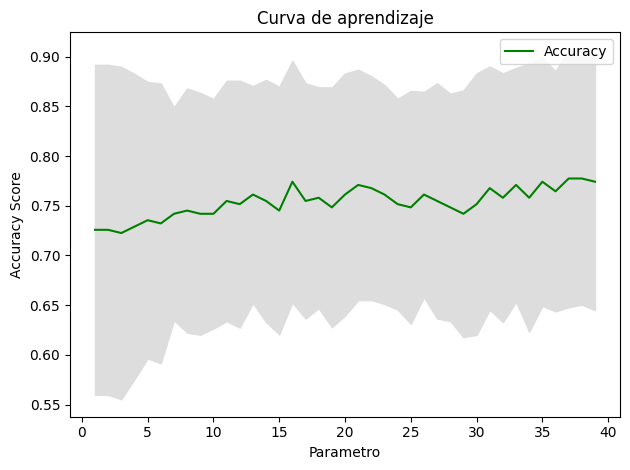

In [78]:
#Dibujamos la curva de aprendizaje
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [89]:
# Utilizamos el codigo para calcular la precision,el recall y el f1
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

#queremos calcular la precision de K-NN, el recall y el f1 de K-NN
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k = 36 sobre los datos re-escalados
clf = KNeighborsClassifier(36, weights='distance')

#Calculamos usando 10-cross validation 
scores = cross_validate(clf, df_rel_esc[variables_relevantes_escaladas], df_rel_esc['Class_att'], scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

#scores nos devuelve los resultados
scores

{'fit_time': array([0.01027298, 0.0028398 , 0.002841  , 0.00484729, 0.00302076,
        0.00285935, 0.00287127, 0.00371218, 0.00327373, 0.00345516]),
 'score_time': array([0.00892997, 0.00731325, 0.01631784, 0.0108645 , 0.007514  ,
        0.00718951, 0.01050186, 0.00825834, 0.00747728, 0.00813627]),
 'test_precision_weighted': array([0.68328446, 0.63709677, 0.70094086, 0.8916129 , 0.76930596,
        0.86972705, 0.90257413, 0.80154278, 0.87131837, 0.84946237]),
 'test_recall_weighted': array([0.5483871 , 0.58064516, 0.64516129, 0.87096774, 0.77419355,
        0.83870968, 0.90322581, 0.80645161, 0.87096774, 0.80645161]),
 'test_f1_weighted': array([0.5530914 , 0.59424586, 0.65666957, 0.86044881, 0.77087693,
        0.82040723, 0.9018044 , 0.80009775, 0.86673183, 0.77707373])}

In [90]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7976865649155271
Exhaustividad ponderada media:  0.764516129032258
F1 ponderado media:  0.7601447513861246


Antes hemos visto las métricas según un media ponderada pero debido a que nuestros datos no son un data frame equilibrado nos es más útil hacerlo por clases para comprobar que clases son las que predice bien nuestro modelo.

In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Usamos 10-cross validation
clf = KNeighborsClassifier(4, weights='distance')
predictions = cross_val_predict(clf, df_rel_esc[variables_relevantes_escaladas], df_rel_esc['Class_att'], cv=10)

# Informe por clases
cr = classification_report(df_rel_esc['Class_att'], predictions, target_names=['Abnormal', 'Normal'])
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.81      0.79      0.80       210
      Normal       0.58      0.60      0.59       100

    accuracy                           0.73       310
   macro avg       0.69      0.70      0.69       310
weighted avg       0.73      0.73      0.73       310



Como se puede observar tenemos mucha mas precision, recall y f1 en los resultados que son abnormal.¿A qué se debe esto? Esto se debe al mayor problema de este tipo de algoritmos que son la falta de datos. Debido a la falta de datos de la categoría 'Normal', no tenemos suficientes ejemplos con los que entrenar, validar y luego testear.
Entonces muchas veces por ejemplo puede darse el caso que al hacer el 10-cross validation en la parte en la que validas con una parte del test de entrenamiento, puede ser que toda esa parte tenga como resultado 'Abnormal'.

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


### Escalar
Al usar redes neuronales, lo adecuado es escalar los datos.

In [17]:
from sklearn.preprocessing import MinMaxScaler

variables_escaladas = ['pelvic_tilt_esc', 'lumbar_lordosis_angle_esc', 'sacral_slope_esc', 'pelvic_radius_esc',
       'degree_spondylolisthesis_esc', 'pelvic_slope_esc', 'Direct_tilt_esc',
       'thoracic_slope_esc', 'cervical_tilt_esc', 'sacrum_angle_esc', 'scoliosis_slope_esc',]

min_max_scaler = MinMaxScaler()
df_esc = df_back.copy()

df_esc[variables_escaladas] = min_max_scaler.fit_transform(df_back[variables])

NameError: ignored

### Optimizando coeficiente de regularización

In [ ]:
df_esc2 = df_esc.loc[:,variables_escaladas]

Vamos a probar valores para el coeficiente de parametrización entre el 0,1 y el 1,9 (0.1, 0.2,  ..., 1.9). Para cada uno de ellos miraremos su precisión y así podremos tomar el que la maximice. 

Para ello utilizamos una red con una capa oculta con 100 neuronas, función de activación ReLU, tamaño de mini-batch 100, tasa de aprendizaje inicial 0.1, y máximo de 1000 iteraciones a los datos.

In [ ]:
#Probamos valores de 0.1 a 1.9 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.0, step=0.1) # [0.1, 0.2,  ..., 1.9]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate_init=0.001, max_iter=1000, random_state=67) #Ha hecho falta aumentar el maximo de iteraciones
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_validate(mlp, df_esc2, df_copy['Class_num'], scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.7870967741935484,
 0.7870967741935484,
 0.7967741935483872,
 0.7903225806451613,
 0.7806451612903226,
 0.7709677419354839,
 0.7612903225806452,
 0.7516129032258065,
 0.7451612903225807,
 0.7354838709677419,
 0.7354838709677419,
 0.732258064516129,
 0.7193548387096775,
 0.7193548387096775,
 0.7193548387096775,
 0.7129032258064517,
 0.7064516129032259,
 0.6903225806451613,
 0.7000000000000001]

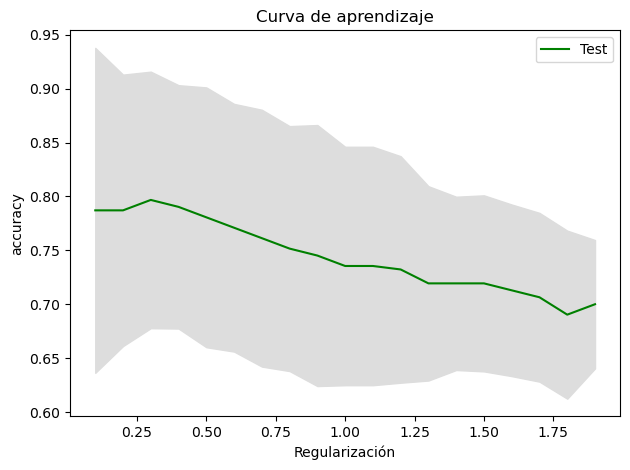

In [ ]:
#Para visualizar cómo afecta el parametro a la precisión usamos el siguiente código de la guía:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Por lo general parece mejor un coeficiente de regularización pequeño. En concreto el que mejor resultados da es un coeficiente de regularización 0,3.

In [ ]:
#Fijado el coeficiente de regularización óptimo, calculamos la precisión, exhaustividad y valor F1 agregadas

# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, #utilizamos el coeficiente de regularizacion 0,3
              batch_size=100, learning_rate_init=0.001, max_iter=1000, random_state=933)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, df_esc2, df_copy['Class_num'], scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test

# Mostramos solo las medias de las métricas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8011523584332139
Exhaustividad ponderada media:  0.7774193548387096
F1 ponderado media:  0.7746889140862411


Las tres métricas son ligeramente superiores a las obtenidas con árboles de decisión y con el clasificador kNN, lo que parece indicar que MLP es algo superior que los otros dos métodos para este problema.

In [ ]:
#Ahora calculamos las métricas detalladas de cada clase

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100, 
             learning_rate_init=0.001, max_iter=1000, random_state=421)
predictions = cross_val_predict(clf, df_esc2, df_copy['Class_num'], cv=10)

# Informe por clases
cr = classification_report(df_copy['Class_num'], predictions, target_names=['Abnormal', 'Normal'])
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.84      0.85      0.85       210
      Normal       0.68      0.67      0.68       100

    accuracy                           0.79       310
   macro avg       0.76      0.76      0.76       310
weighted avg       0.79      0.79      0.79       310



Similarmente a con los otros métodos, la precisión, exhaustividad y valor F1 son mucho mejores para la clase Abnormal que para la Normal, debido a la falta de equilibrio en las muestras como ya mencionamos.

A continuación dibujamos la matriz de confusión.

Confusion matrix, without normalization
[[179  31]
 [ 33  67]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

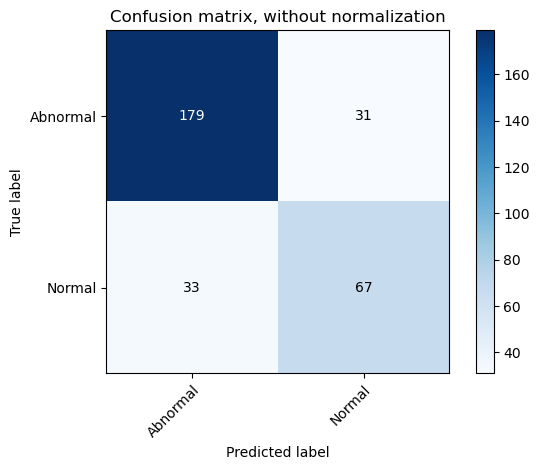

In [ ]:
plot_confusion_matrix(df_copy['Class_num'], predictions, ['Abnormal', 'Normal'], normalize=False)

Tiene algunos aciertos más que con árboles de decisión (solo 4) pero la tabla de confusión es casi igual indicando que en este problema ambos métodos llevan a resultados similares.

Este método tampoco es muy fiable, y similarmente a otros habría de usarse solo de forma orientativa. Además tiene la desventaja de ser muy poco "transparente", es decir, no se puede saber como ha llegado a sus conclusiones y eso hace que no nos podamos fiar completamente de ninguna de sus predicciones.